use:  cuda


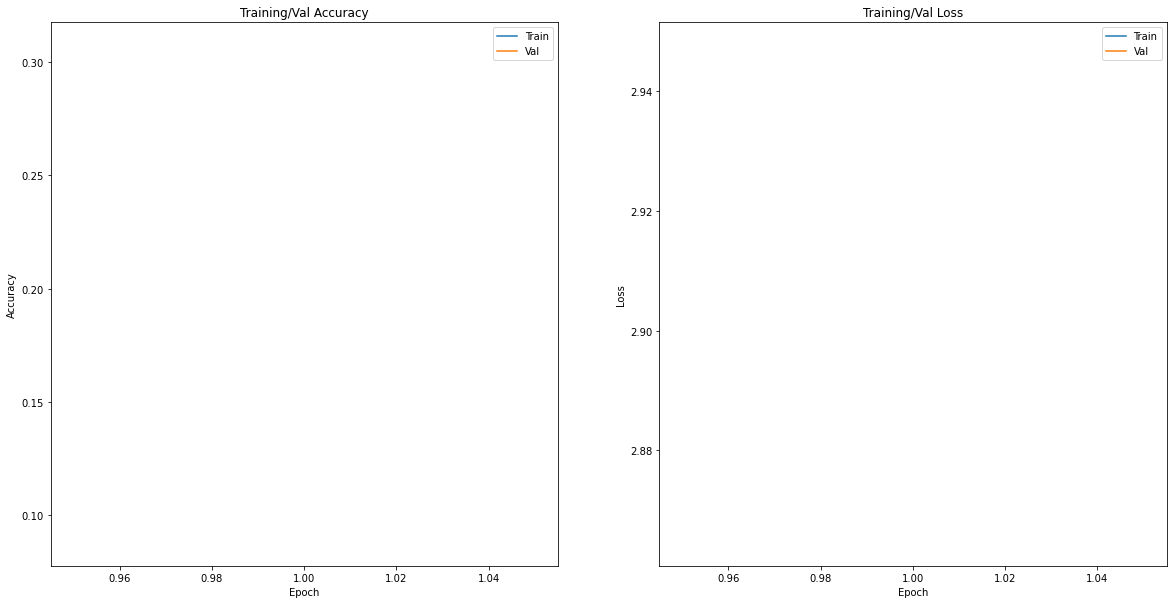

LR : 0.001, Batch Size : 32, 현재 Epoch : 1
Train 정확도 : 0.08858741819858551, Train Loss : 2.864809036254883
Val 정확도 : 0.306669145822525, Val Loss : 2.947415590286255
가장 높은 Val 정확도 : 0.306669145822525


In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from dataset import Dacon
from model import *
from PIL import Image
from tqdm.auto import tqdm, trange
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('use: ',device)

checkpoint = torch.load('vit.pt')
train_accuracy_list = checkpoint['train_accuracy']
train_loss_list = checkpoint['train_loss']
val_accuracy_list = checkpoint['val_accuracy']
val_loss_list = checkpoint['val_loss']
learning_rate = checkpoint['learning_rate']
batch_size = checkpoint['batch_size']

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Training/Val Accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].plot(range(1, len(train_accuracy_list)+1), train_accuracy_list)
ax[0].plot(range(1, len(val_accuracy_list)+1), val_accuracy_list)
ax[0].legend(['Train', 'Val'])
#ax[0].set_xlim(left=15)
#ax[0].set_ylim(bottom=0.8)

ax[1].set_title("Training/Val Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")
ax[1].plot(range(1, len(train_loss_list)+1), train_loss_list)
ax[1].plot(range(1, len(val_loss_list)+1), val_loss_list)
ax[1].legend(['Train', 'Val'])
#ax[1].set_xlim(left=15)
#ax[1].set_ylim(top=1.5)
plt.show()

print(f"LR : {learning_rate}, Batch Size : {batch_size}, 현재 Epoch : {checkpoint['epoch']}")
print(f"Train 정확도 : {train_accuracy_list[-1]}, Train Loss : {train_loss_list[-1]}")
print(f"Val 정확도 : {val_accuracy_list[-1]}, Val Loss : {val_loss_list[-1]}")
print(f"가장 높은 Val 정확도 : {max(val_accuracy_list)}")